In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/gen_keys.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 37

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(37, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 37)             │           407 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,477 (5.77 KB)

 Trainable params: 1,477 (5.77 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# モデルチェックポイントのコールバック
model_save_path = "model.keras"
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
106/159 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.0628 - loss: 3.5462  
Epoch 1: saving model to model.keras
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0765 - loss: 3.4680 - val_accuracy: 0.1441 - val_loss: 2.6138
Epoch 2/1000
117/159 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.2007 - loss: 2.5884
Epoch 2: saving model to model.keras
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.2107 - loss: 2.5517 - val_accuracy: 0.5426 - val_loss: 1.9065
Epoch 3/1000
105/159 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.3229 - loss: 2.0720
Epoch 3: saving model to model.keras
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.3305 - loss: 2.0439 - val_accuracy: 0.6784 - val_loss: 1.4713
Epoch 4/1000
154/159 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.4089 - loss: 1.7724
Epoch 4: saving model to model.keras
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.4095 - loss: 1.7711 - val_accuracy: 0.8005 - val_loss: 1.2599
Epoch 5/1000
111

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9207 - loss: 0.3804


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[2.2951369e-10 7.8348734e-07 1.2168943e-09 2.9505713e-08 5.0950830e-06
 9.2383528e-01 6.7399912e-11 2.1227689e-24 1.7928109e-05 1.0327761e-06
 3.9658775e-05 3.0289705e-27 1.0818794e-05 3.9573029e-06 1.7328292e-02
 3.1433390e-06 4.8986323e-02 4.1553718e-05 3.9704984e-18 3.6556452e-11
 8.4308296e-04 5.9639548e-05 2.3129931e-09 1.1163192e-08 1.8175691e-06
 3.3040740e-19 1.8913708e-09 1.7801793e-07 1.2188805e-05 7.0725610e-03
 2.7068205e-09 3.1870397e-07 2.2888518e-05 1.7131447e-03 4.6209796e-09
 5.0510630e-11 3.1466340e-07]
5


# 混同行列

211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step


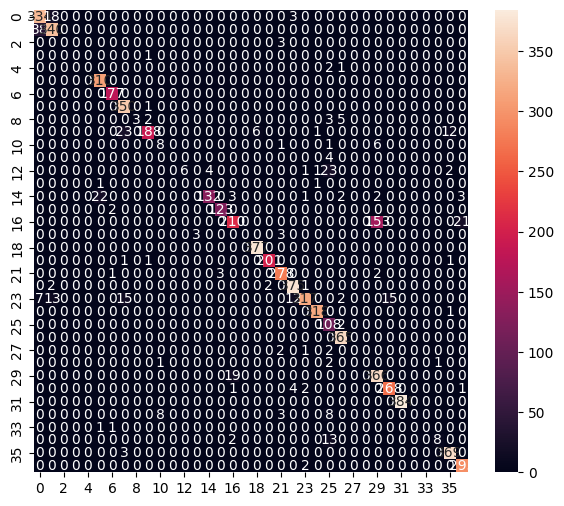

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       355
           1       0.91      0.90      0.91       378
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.93      1.00      0.96       310
           6       0.98      1.00      0.99       177
           7       0.89      1.00      0.94       351
           8       1.00      0.23      0.38        13
           9       0.97      0.82      0.89       230
          10       0.47      0.50      0.48        16
          11       0.00      0.00      0.00         4
          12       1.00      0.16      0.28        37
          13       0.00      0.00      0.00         2
          14       0.97      0.80      0.88       165
          15       0.98      0.98      0.98       125
          16       0.89      0.55      0.68       384
     

/Users/samarthbhole/Desktop/gesture_rec/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/samarthbhole/Desktop/gesture_rec/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/samarthbhole/Desktop/gesture_rec/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/ng/y92sq3hj4276g9g0c9qlrv5w0000gn/T/tmp1ygf1lyn/assets


INFO:tensorflow:Assets written to: /var/folders/ng/y92sq3hj4276g9g0c9qlrv5w0000gn/T/tmp1ygf1lyn/assets


Saved artifact at '/var/folders/ng/y92sq3hj4276g9g0c9qlrv5w0000gn/T/tmp1ygf1lyn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 37), dtype=tf.float32, name=None)
Captures:
  6402211280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6416859216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6416860752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6416873232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6416873040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6416870928: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1730651562.117461 1296466 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1730651562.117927 1296466 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1730651562.121589 1296466 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


8004

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 437 μs, sys: 793 μs, total: 1.23 ms
Wall time: 825 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.2951539e-10 7.8349092e-07 1.2168941e-09 2.9505655e-08 5.0950871e-06
 9.2383516e-01 6.7399905e-11 2.1227851e-24 1.7928123e-05 1.0327750e-06
 3.9658848e-05 3.0289936e-27 1.0818792e-05 3.9572988e-06 1.7328292e-02
 3.1433356e-06 4.8986364e-02 4.1553711e-05 3.9705133e-18 3.6556452e-11
 8.4308290e-04 5.9639598e-05 2.3129973e-09 1.1163191e-08 1.8175672e-06
 3.3040864e-19 1.8913742e-09 1.7801824e-07 1.2188792e-05 7.0725707e-03
 2.7068308e-09 3.1870454e-07 2.2888536e-05 1.7131428e-03 4.6209792e-09
 5.0510821e-11 3.1466425e-07]
5
